In [30]:
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pathlib
import io
from keras import models, layers, optimizers, regularizers
import math
import random

import PIL
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from google.colab import files
  
uploaded = files.upload()

Saving jay_input.csv to jay_input (1).csv


In [32]:
df_train = pd.read_csv(io.BytesIO(uploaded['jay_input.csv']), sep=',', index_col=0)
df_train.head(41)

,item,bid_p,chance
row.names,,,
1,1,35,1
2,2,9,0
3,1,10,1
4,1,22,1
5,2,17,1
6,3,44,1
7,2,28,1
8,3,54,1
9,3,33,0


In [33]:
n_test = int(math.ceil(len(df_train) * 0.3))
random.seed(42)
test_ixs = random.sample(list(range(len(df_train))), n_test)
train_ixs = [ix for ix in range(len(df_train)) if ix not in test_ixs]
train = df_train.iloc[train_ixs, :]
test = df_train.iloc[test_ixs, :]
print(len(train))
print(len(test))

28
12


In [34]:
features = ['bid_p'] #stuff to train
response = 'chance' #label to train over (chance max)
x_train = train[features]
y_train = train[response]
x_test = test[features]
y_test = test[response]

In [35]:
#Assignment system - decides winner 
hidden_units = 10     # how many neurons in the hidden layer
activation = 'sigmoid'   # activation function for hidden layer
l2 = 0.01             # regularization - how much we penalize large parameter values
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 5            # how many epochs to train for
batch_size = 3       # how many samples to use for each gradient descent update

In [36]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=len(features), units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units, units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
10/10 [==============================] - 1s 2ms/step - loss: 0.6759 - accuracy: 0.6288
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6282 - accuracy: 0.7776
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6461
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 0.6155 - accuracy: 0.6714
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 0.5447 - accuracy: 0.8483
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5740 - accuracy: 0.8281
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.9053
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7766
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8895
Epoch 10/10
1/1 [==============================] - 0s 20ms/step - loss: 0.5353 - accuracy: 0.8333
Training accuracy: 0

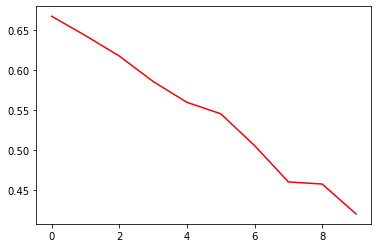

In [37]:
# train the parameters
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]

test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]

print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()


In [40]:
predictions = model.predict([44, 12, 23, 1, 98]) #These are very basic examples of bids 

# Print our model's predictions.
print(predictions)


[[0.69544613]
 [0.24351808]
 [0.4877402 ]
 [0.07930803]
 [0.7392717 ]]
